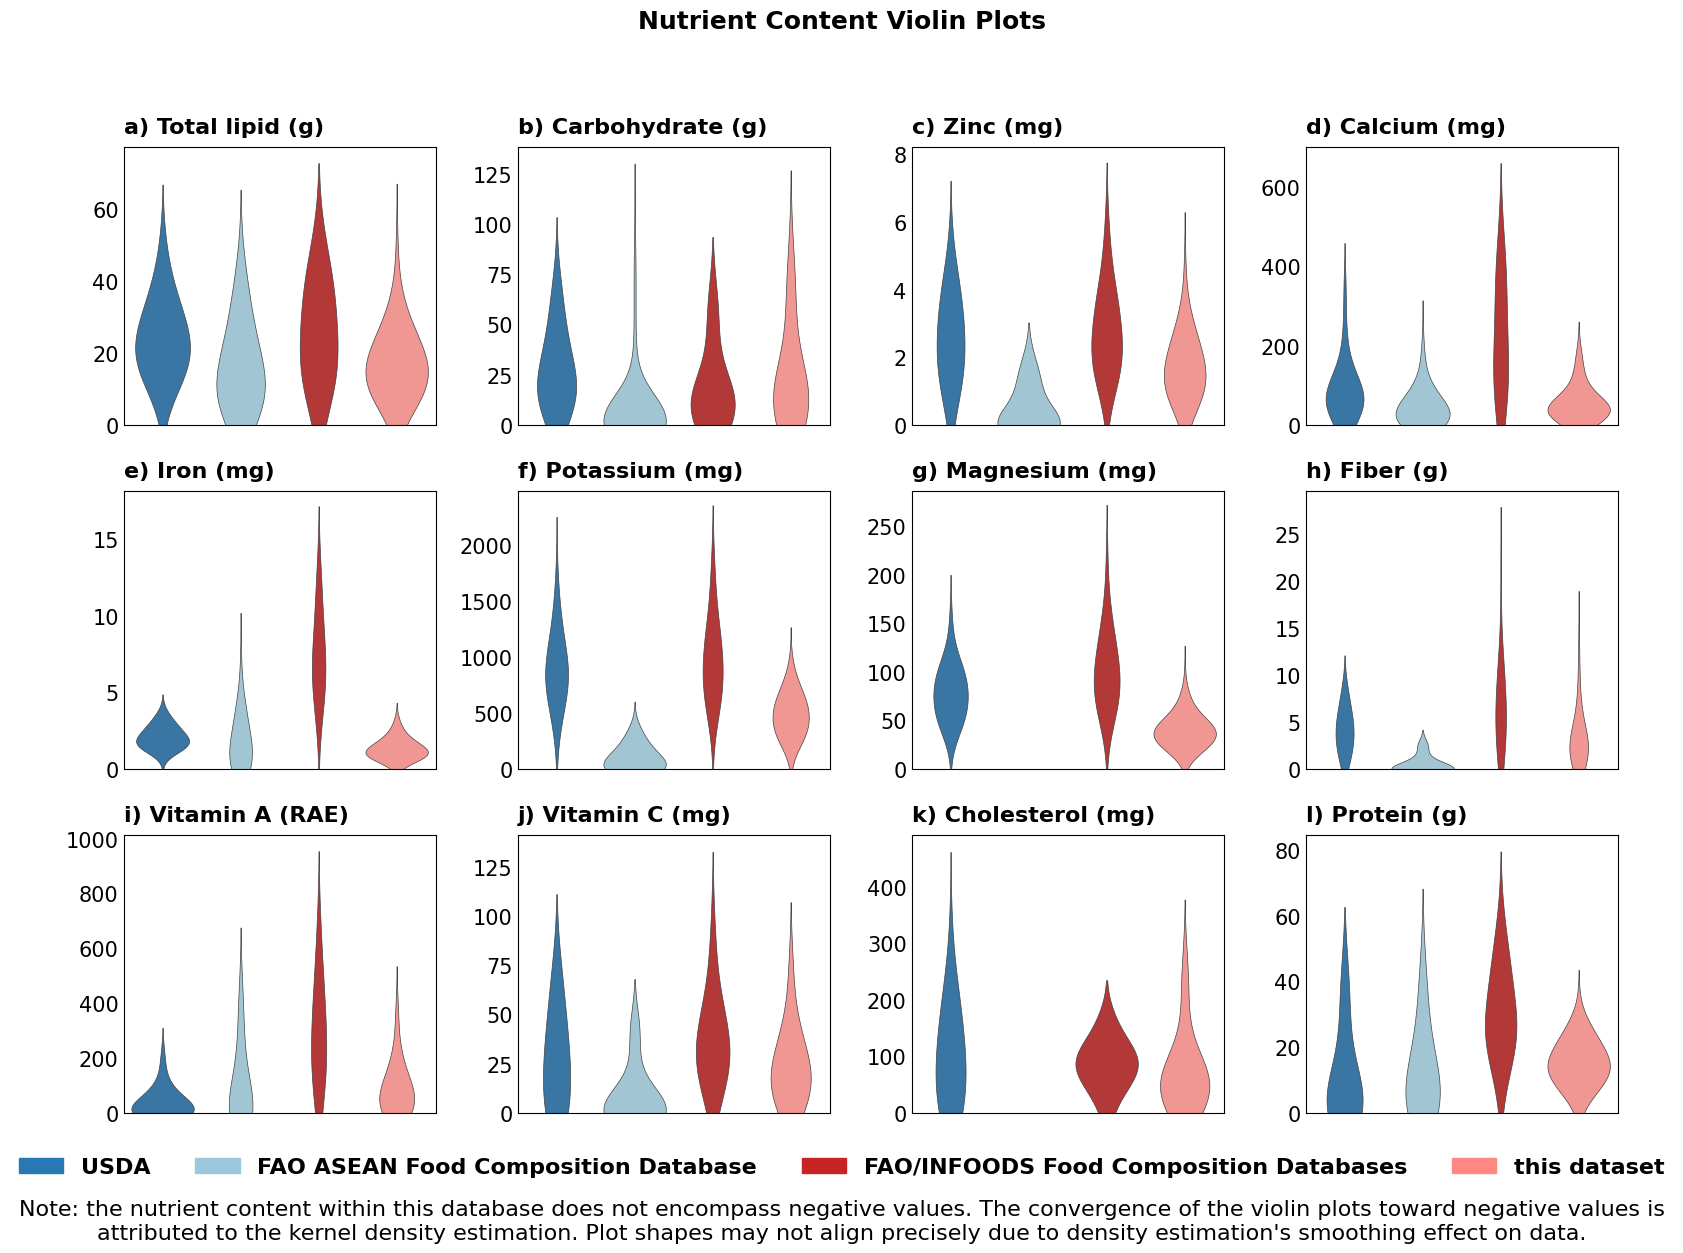

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 设置字体为 Arial
prop = fm.FontProperties(fname=fm.findfont(fm.FontProperties(family="Arial")))
plt.rc('font', size=16)  # 设置全局字体大小为12

# 读取数据
df = pd.read_excel('')
df3 = pd.read_excel('')
df2 = pd.read_excel('')
df4 = pd.read_excel('')

# 去除 'Vitamin A, IU' 列
df_violin = df
df_violin4 = df3.drop(columns=['Vitamin E (alpha-tocopherol)'])
df_violin2 = df2
df_violin3 = df4

# 计算每列的2.5%和97.5%分位数
lower_bounds = df_violin.quantile(0.1)
upper_bounds = df_violin.quantile(0.8)
lower_bounds2 = df_violin2.quantile(0.1)
upper_bounds2 = df_violin2.quantile(0.9)
lower_bounds4 = df_violin4.quantile(0.1)
upper_bounds4 = df_violin4.quantile(0.98)
lower_bounds3 = df_violin3.quantile(0.1)
upper_bounds3 = df_violin3.quantile(0.8)

# 使用分位数过滤每列的值
for col in df_violin.columns:
    df_violin = df_violin[df_violin[col] >= lower_bounds[col]]
    df_violin = df_violin[df_violin[col] <= upper_bounds[col]]
for col in df_violin2.columns:
    df_violin2 = df_violin2[df_violin2[col] >= lower_bounds2[col]]
    df_violin2 = df_violin2[df_violin2[col] <= upper_bounds2[col]]
for col in df_violin3.columns:
    df_violin3 = df_violin3[df_violin3[col] >= lower_bounds3[col]]
    df_violin3 = df_violin3[df_violin3[col] <= upper_bounds3[col]]
for col in df_violin4.columns:
    df_violin4 = df_violin4[df_violin4[col] >= lower_bounds4[col]]
    df_violin4 = df_violin4[df_violin4[col] <= upper_bounds4[col]]

# 获取列名（营养成分）作为小提琴图的标签
labels = df_violin.columns

# 为每个数据框添加一个表示其来源的列
df_violin['source'] = 'df'
df_violin2['source'] = 'df2'
df_violin3['source'] = 'df4'
df_violin4['source'] = 'df3'

# 合并三个数据框
combined_data = pd.concat([df_violin, df_violin2, df_violin3, df_violin4])

# 绘制小提琴图
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.suptitle("Nutrient Content Violin Plots", fontsize=18, fontweight="bold")

# 定义颜色
palette = {"df": "#2878B5", "df2": "#9AC9DB", "df3": "#FF8884" ,"df4": "#C82423"}

# 为图例创建标签和handles
import matplotlib.patches as mpatches
handle1 = mpatches.Patch(color=palette['df'], label="USDA")
handle2 = mpatches.Patch(color=palette['df2'], label="FAO ASEAN Food Composition Database")
handle3 = mpatches.Patch(color=palette['df4'], label="FAO/INFOODS Food Composition Databases")
handle4 = mpatches.Patch(color=palette['df3'], label="this dataset")
# fig.legend(handles=[handle1, handle2, handle3], loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3, fontsize=15)
# fig.legend(handles=[handle1, handle2, handle3], loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=18, frameon=False)
# fig.legend(handles=[handle1, handle2, handle3], loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=3, fontsize=18, frameon=False, prop={'weight': 'bold'})
fig.legend(handles=[handle1, handle2, handle3, handle4], loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=4, fontsize=18, frameon=False, prop={'weight': 'bold'})

# 定义子图编号
subfigure_labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)']
nutrient_names = ['Total lipid (g)', 'Carbohydrate (g)', 'Zinc (mg)', 'Calcium (mg)', 'Iron (mg)', 'Potassium (mg)', 'Magnesium (mg)', 'Fiber (g)', 'Vitamin A (RAE)', 'Vitamin C (mg)', 'Cholesterol (mg)', 'Protein (g)']

for idx, ax in enumerate(axes.flatten()):
    if idx < len(labels):
        nutrient = labels[idx]
        
        sns.violinplot(x='source', y=nutrient, data=combined_data, ax=ax, palette=palette, inner=None, fontsize=15,linewidth=0.5, alpha=0.7, bw=0.8)
#         sns.violinplot(x=None, y=nutrient, data=combined_data, ax=ax, palette=palette, inner=None, linewidth=0.5, alpha=0.7, bw=0.5)

        # 设置y轴范围
        ax.set_ylim(0)
        
        # 添加子图编号和标题
        ax.text(-0.5, ax.get_ylim()[1]*1.05, subfigure_labels[idx] + " " + nutrient_names[idx], fontsize=16, fontweight="bold", ha='left')
        
        # 隐藏x轴标签
        ax.set_xticklabels([])

        # 将 y 轴标签旋转角度设为 0
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelrotation=0, labelsize=15)
        
        # 隐藏网格线
        ax.yaxis.grid(False)
        
        # 移除刻度线
        ax.tick_params(axis='both', which='both', length=0)
        
        # 设置子图框线颜色为黑色
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
        ax.set_xlabel('')
        ax.set_ylabel('')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
annotation = ("Note: the nutrient content within this database does not encompass negative values. The convergence of the violin plots toward negative values is attributed to the kernel density estimation. Plot shapes may not align precisely due to density estimation's smoothing effect on data.")
fig.text(0.5, -0.03, annotation, ha='center', va='center', fontsize=16, wrap=True)

# 保存图像
plt.savefig("combined_violinplots.png", dpi=300)
plt.show()
